# Milestone 2 - Phase 1
Fathiyah Kalamal Haq

# **Prediksi Harga Mobil**

Dataset yang digunakan diambil dari platform [kaggle.](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction) Dataset ini berisi harga-harga mobil dengan spesifikasi mobil yang mungkin menjadi faktor berpengaruh bagi penentuan harga mobil. Berikut uraian kolom yang ada pada dataset Harga mobil.

| Input Parameter   | Description                                                                                                                          |
| ----------------- | ------------------------------------------------------------------------------------------------------------------------------------ |
| Car_ID			| Unique id of each observation (Interger)	                                                                                           |
|Symboling 			|Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)  |
|carCompany			|Name of car company (Categorical)		                                                                                               |
|fueltype			|Car fuel type i.e gas or diesel (Categorical)		                                                                                   |
|aspiration			|Aspiration used in a car (Categorical)		                                                                                           |
|doornumber			|Number of doors in a car (Categorical)		                                                                                           |
|carbody			|body of car (Categorical)	                                                                                                           |
|drivewheel			|type of drive wheel (Categorical)		                                                                                               |
|enginelocation		|Location of car engine (Categorical)		                                                                                           |
|wheelbase			|Weelbase of car (Numeric)		                                                                                                       |
|carlength			|Length of car (Numeric)		                                                                                                       |
|carwidth			|Width of car (Numeric)		|
|carheight			|height of car (Numeric)	|	
|curbweight			|The weight of a car without occupants or baggage. (Numeric)		|
|enginetype			|Type of engine. (Categorical)		|
|cylindernumber		|cylinder placed in the car (Categorical)		|
|enginesize			|Size of car (Numeric)		|
|fuelsystem			|Fuel system of car (Categorical)	|	
|boreratio			|Boreratio of car (Numeric)		|
|stroke			    |Stroke or volume inside the engine (Numeric)|		
|compressionratio	|compression ratio of car (Numeric)		|
|horsepower			|Horsepower (Numeric)		|
|peakrpm			|car peak rpm (Numeric)		|
|citympg			|Mileage in city (Numeric)	|	
|highwaympg			|Mileage on highway (Numeric)		|
|price(Dependent variable)			|Price of car (Numeric)   |	

Dari dataset ini akan diprediksi harga mobil dengan model regresi yang terbaik. Model regresi yang akan digunakan untuk memprediksi harga mobil antara lain regresi linear, regresi polinomial, regresi ridge, regresi lasso, random forest regressor dan decision tree regressor.




# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder, PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error,r2_score,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


# Data Loading

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv',sep=",")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

# EDA

In [6]:
df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

## Statistik Deskriptif

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


Pada Curb Weight, Compression ratio, city MPG, highway MPG, Harga mobil rentang antara Q3 dengan nilai maksimumnya cukup jauh sehingga pada kolom-kolom tersebut kecenderungan untuk membentuk outlier cukup besar. 
Jika dilihat dari nilai rata-rata dan Q2 nya yang memiliki rentang kecil, banyak kolom yang berdistribusi normal.

## Unique Value

In [8]:
num  = df.select_dtypes(include=np.number).columns.to_list()
cat = df.select_dtypes(include='object').columns.to_list()
print('num',num)
print("cat",cat)

num ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
cat ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [9]:
df[cat].nunique()

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

Car Name memiliki jumlah unique value yang tinggi atau *high cardinality*.

In [10]:
for col in cat[1:]:
    print(col,' unique: ',df[col].unique())

fueltype  unique:  ['gas' 'diesel']
aspiration  unique:  ['std' 'turbo']
doornumber  unique:  ['two' 'four']
carbody  unique:  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel  unique:  ['rwd' 'fwd' '4wd']
enginelocation  unique:  ['front' 'rear']
enginetype  unique:  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber  unique:  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem  unique:  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


Fueltype merupakan ringkasan dari fuelsystem dimana mobil dengan mesin diesel menggunakan fuel injection systemnya dengan sistem direct dan indirect injection (IDI). sedangkan untuk mobil dengan gasoline engine metode injeksi bahan bakarnya adalah dengan MPI (Multi Port Fuel Injection), SPFI (Sequential Port Fuel Injection ), Barrel yang dalam dataset ini disimbolkan 1BBL, 2BBL, 4BBL (Allen, 2022).

## Pearson Correlation

<AxesSubplot:>

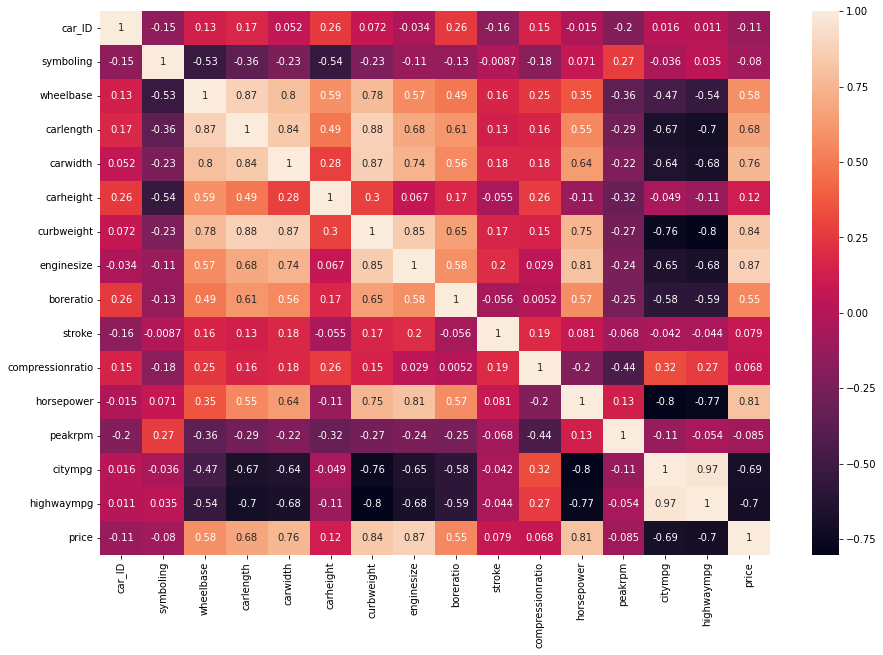

In [11]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True)

Dari tabel heatmap diatas, diketahui bahwa beberapa variabel saling berkorelasi tinggi (multikolinier). Variabel-variabel yang terindikasi multikolinieritas adalah variabel yang bersangkutan dengan karakter luar mobil seperti (carlength, carwidth, carheigth, wheelbase, curbweight), dan variabel yang bersangkutan dengan kemampuan mobil seperti horse power, city MPG, highway MPG.

<AxesSubplot:>

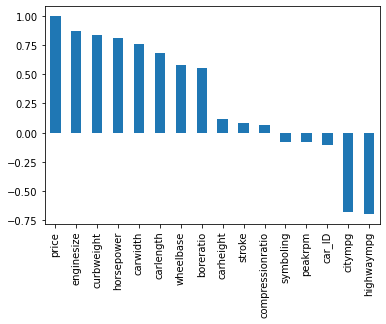

In [12]:
df.corrwith(df.price).sort_values(ascending=False).plot(kind='bar')

Korelasi tiap variabel terhadap target memperlihatkan variabel yang berpengaruh tinggi terhadap perubahan variabel target adalah:
1. enginesize
2. curbweight
3. horsepower
4. carwidth
5. cylindernumber
6. wheelbase
7. boreratio
8. citympg
9. highwaympg

## Harga mobil berdasarkan Bentuk Mobil

<AxesSubplot:xlabel='carbody'>

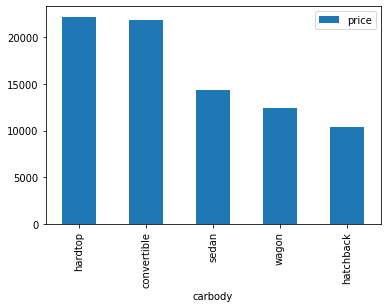

In [13]:
df[['carbody','price']].groupby('carbody').mean().sort_values('price',ascending=False).plot(kind='bar')

Harga mobil termahal rata-ratanya berada pada mobil berbentuk hardtop dan convertible.

# Data Preprocessing

## Cardinality

### Cylinder number

Pada cylinder number tipe datanya adalah string, namun merepresentasikan numerik. Sehingga diubah menjadi bentuk numerik agar memudahkan encoding saat normalisasi.

In [14]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [15]:
df.cylindernumber = df.cylindernumber.replace({
    'four':4, 'six':6, 'five': 5, 'three':3, 'twelve':12, 'two':2, 'eight':8
})

In [16]:
df.cylindernumber.unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

## Outlier

<AxesSubplot:>

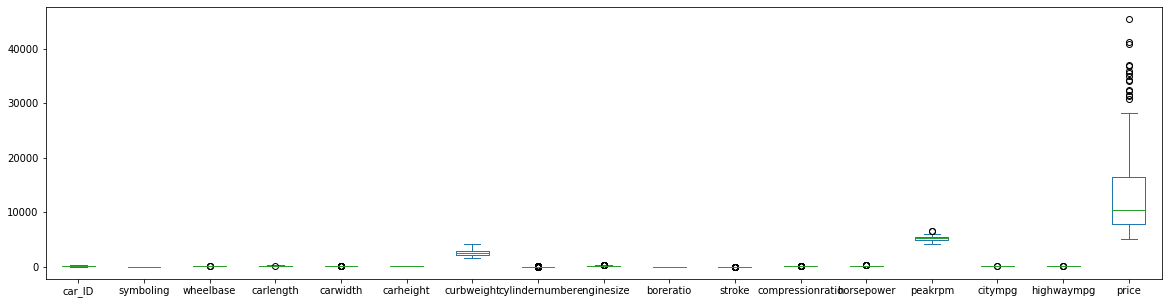

In [17]:
df.plot(kind='box',figsize=(20,5))

Outlier terdeteksi di beberapa kolom, namun outlier yang terbentuk adalah natural outlier. Sehingga jika dilakukan handling outlier akan memangkas informasi penting yang bisa menentukan nilai harga mobil, maka keputusannya outlier ini tidak akan di-*handling*

## Missing Value

In [18]:
df.isnull().sum().sum()

0

Tidak ada missing value pada dataset ini

### Splitting data

In [19]:
#split inference
inf = df.sample(5,random_state=1)
non_inf = df.drop(inf.index,axis=0)

#split X,y
X = non_inf.drop('price',axis=1)
y = non_inf['price']

#split train test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 25)
(40, 25)
(160,)
(40,)


## Feature Selection

In [20]:
drop_col = ['car_ID','CarName','citympg', 'highwaympg','carheight','fuelsystem']

Alasan seleksi fitur:
1. car_ID: High Cardinality
2. CarName: HIgh Cardinality dan prediksi ini bukan berdasarkan merek mobil
3. city MPG dan highway MPG bisa saling mewakilkan namun juga berkorelasi tinggi secara negatig dengan horsepower, sehingga cukup diwakilkan oleh horsepower
4. carheight multikolinier dengan carwidth, carlength namun carheigth memiliki korelasi lebih rendah terhadap target.
5. fuelsystem adalah uraian lengkap dari fueltype, sehingga dengan fueltype saja sudah bisa mewakili informasi dari fuelsystem.

In [21]:
X_train = X_train.drop(drop_col, axis=1)
X_test = X_test.drop(drop_col, axis=1)
inf2 = inf.drop(drop_col, axis=1)

# Feature Scaling and Encoding

In [22]:
num_col = X_train.select_dtypes(include=np.number).columns.tolist()
cat_col = X_train.select_dtypes(include='object').columns.tolist()
print('num', num_col)
print("cat", cat_col)

num ['symboling', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm']
cat ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype']


In [23]:
ohe = OneHotEncoder()
std = StandardScaler()

### Pipeline preprocessing

Pipeline preprocessing berisi Feature scaling dengan Standard Scaler untuk fitur numerik dan Feature encoding dengan One Hot Encoder untuk fitur kategorik.

In [24]:
pipe_prep = ColumnTransformer([
    ('scale',std,num_col),
    ('encode',ohe,cat_col)
])
pipe_prep

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 ['symboling', 'wheelbase', 'carlength',
                                  'carwidth', 'curbweight', 'cylindernumber',
                                  'enginesize', 'boreratio', 'stroke',
                                  'compressionratio', 'horsepower',
                                  'peakrpm']),
                                ('encode', OneHotEncoder(),
                                 ['fueltype', 'aspiration', 'doornumber',
                                  'carbody', 'drivewheel', 'enginelocation',
                                  'enginetype'])])

# Model Definition

In [25]:
linreg = LinearRegression(fit_intercept=True)
linreg_poly = LinearRegression(fit_intercept=True)
poly = PolynomialFeatures(3)
ridge = Ridge(alpha=1,random_state=1)
lasso = Lasso(alpha=0.1,random_state=1)
rf = RandomForestRegressor(random_state=1)
dt = DecisionTreeRegressor(random_state=1)

model regresi yang digunakan adalah linear regresi, regresi polinomial, regresi Ridge, Regresi lasso, Random forest, dan decision tree. Alasan pemilihan regresi Ridge adalah karena  regresi ridge dapat meminimumkan dampak multikolinieritas (Wasilaine, 2014). Regresi Lasso pun dapat meminimumkan efek dari multikolinieritas namun caranya agak berbeda dengan Ridge dimana lasso langsung memberi weight=0 pada loss function hingga menyeleksi variabel yang terpilih saja (Robbani, 2019). Regresi polinomial dapat pula mengatasi masalah multikolinieritas dengan memodifikasi bentuk dari regresi linear aslinya (Malensang, 2013).

Selanjutnya Random Forest dan Decision Tree Regressor dipilih dalam prediksi harga mobil ini karena merupakan metode CART (Classification and Regression Tree) yang mana metode tersebut tidak memiliki asumsi apapun dan dapat digunakan dalam kasus klasifikasi dan regresi, kedua metode ini dapat meningkatkan akurasi hasil prediksinya (Mulhayati, 2020).


## Pipeline model

Pipeline preprocessing digabungkan menjadi pipeline masing-masing model.

In [26]:
pipe_linreg = Pipeline([
    ('scaler',pipe_prep),
    ('model',linreg)
])
pipe_ridge = Pipeline([
    ('scaler',pipe_prep),
    ('model',ridge)
])
pipe_lasso = Pipeline([
    ('scaler',pipe_prep),
    ('model',lasso)
])
pipe_rf = Pipeline([
    ('scaler',pipe_prep),
    ('model',rf)
])
pipe_dt = Pipeline([
    ('scaler',pipe_prep),
    ('model',dt)
])

# Model Training

Dilakukann training data dengan memanfaatkan fungsi pipeline dengan hanya melakukan .fit pada raw data namun hasil prediksinya sama dengan tanpa pipeline

## Linear Regression

In [27]:
pipe_linreg.fit(X_train,y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'curbweight',
                                                   'cylindernumber',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm']),
                                                 ('encode', OneHotEncoder(),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
        

## Ridge Regression

In [28]:
pipe_ridge.fit(X_train,y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'curbweight',
                                                   'cylindernumber',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm']),
                                                 ('encode', OneHotEncoder(),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
        

## Lasso Regression

In [29]:
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'curbweight',
                                                   'cylindernumber',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm']),
                                                 ('encode', OneHotEncoder(),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
        

## Random Forest Regressor

In [30]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'curbweight',
                                                   'cylindernumber',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm']),
                                                 ('encode', OneHotEncoder(),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
        

## Decision Tree Regressor

In [31]:
pipe_dt.fit(X_train,y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'curbweight',
                                                   'cylindernumber',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm']),
                                                 ('encode', OneHotEncoder(),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
        

## Polynomial Regression

In [32]:
# preprocessing for polynomial regression
pipe_prep.fit(X_train)
X_train_scale = pipe_prep.transform(X_train)
X_test_scale = pipe_prep.transform(X_test)

X_train_poly = poly.fit_transform(X_train_scale)
X_test_poly = poly.transform(X_test_scale)
# polynomial data training
linreg_poly.fit(X_train_poly,y_train)

LinearRegression()

# Model Evaluation

### Regresi linear

In [33]:
pipe_linreg.predict(X_train)

array([16332.76104274, 17093.79320039, 16135.25003388, 22577.07817777,
       14428.6067011 ,  6301.10204994,  5776.64477413,  8177.96977793,
        7753.31971183, 36234.61173037, 16819.53526544, 33674.69413481,
        9792.08355705, 12546.37339767,  7049.68380327,  9101.86513244,
        9905.91887471, 16052.90001097, 20840.95367996,  7936.40014753,
        6246.27677478, 27625.42077089,  9056.79849311,  6610.83973165,
       32686.66999071, 15963.28500983,  8600.96218768, 12422.49735364,
        5573.35908884, 27525.52062194, 12546.37339767, 11320.4438139 ,
       10521.50559403,  8038.6426567 , 13027.1468717 , 16597.42524499,
       20265.83710149,  6103.26059594,  6521.59385969, 15390.0854529 ,
        7656.2991425 ,  5377.49452325, 14813.65733491, 33674.69413481,
       16191.70632095, 20750.19682921,  9999.22607701, 13203.25080817,
       11312.54465093, 32586.48681895, 16856.07071549,  7407.12678189,
        8019.33909146, 16245.45877315,  8802.88989168, 12623.81050776,
      

In [34]:
y_pred_ltest = pipe_linreg.predict(X_test)
y_pred_ltrain = pipe_linreg.predict(X_train)

In [35]:
print('R2 train ', r2_score(y_train,y_pred_ltrain))
print('R2 test ', r2_score(y_test,y_pred_ltest))
print('MAPE train ',mean_absolute_percentage_error(y_train,y_pred_ltrain))
print('MAPE test ', mean_absolute_percentage_error(y_test ,y_pred_ltest))
print('MAE train ',mean_absolute_error(y_train,y_pred_ltrain))
print('MAE test ', mean_absolute_error(y_test ,y_pred_ltest))

R2 train  0.947197160839983
R2 test  0.6946274512480354
MAPE train  0.10999518520164757
MAPE test  0.20161735802955535
MAE train  1343.7375036167527
MAE test  2569.132978727904


Hasil dari base model linear regression sangat bagus pada saat training data namun berubah sangat buruk saat testing pada data baru. Hal ini mengindikasikan performa model yang *overfit* artinya model hanya dapat dengan baik memprediksi saat training namun jika dihadapkan pada data baru kemampuannya menurun cukup jauh.

### Regresi Ridge

In [36]:
y_pred_rtest = pipe_ridge.predict(X_test)
y_pred_rtrain = pipe_ridge.predict(X_train)
print('R2 train ', r2_score(y_train,y_pred_rtrain))
print('R2 test ', r2_score(y_test,y_pred_rtest))
print('MAPE train ',mean_absolute_percentage_error(y_train,y_pred_rtrain))
print('MAPE test ', mean_absolute_percentage_error(y_test ,y_pred_rtest))
print('MAE train ',mean_absolute_error(y_train,y_pred_rtrain))
print('MAE test ', mean_absolute_error(y_test ,y_pred_rtest))

R2 train  0.9425238069985722
R2 test  0.7384680364385052
MAPE train  0.11580842747542938
MAPE test  0.19834600348649295
MAE train  1431.7248741030137
MAE test  2483.127220115265


Hasil prediksi regresi ridge pun *overfit* walau ada kenaikan nilai r2 score test. Jika dilihat dari MAE model performanya *goodfit*, walau tetap pada MAE model terindikasi *overfit*. Namun performa model saat menguji data test mengalami peningkatan menjadi lebih baik.

### Regresi Lasso

In [37]:
y_pred_lastest = pipe_lasso.predict(X_test)
y_pred_lastrain = pipe_lasso.predict(X_train)
print('R2 train ', r2_score(y_train,y_pred_lastrain))
print('R2 test ', r2_score(y_test,y_pred_lastest))
print('MAPE train ',mean_absolute_percentage_error(y_train,y_pred_lastrain))
print('MAPE test ', mean_absolute_percentage_error(y_test ,y_pred_lastest))
print('MAE train ',mean_absolute_error(y_train,y_pred_lastrain))
print('MAE test ', mean_absolute_error(y_test ,y_pred_lastest))

R2 train  0.9471968830779041
R2 test  0.6947255648760378
MAPE train  0.10999691780386503
MAPE test  0.201488152519041
MAE train  1343.9413670022634
MAE test  2568.1698746552784


Hasil evaluasi regresi Lasso adalah *overfit* untuk semua metrik evaluasinya.

### Random Forest

In [38]:
y_pred_rftest = pipe_rf.predict(X_test)
y_pred_rftrain = pipe_rf.predict(X_train)
print('R2 train ', r2_score(y_train,y_pred_rftrain))
print('R2 test ', r2_score(y_test,y_pred_rftest))
print('MAPE train ',mean_absolute_percentage_error(y_train,y_pred_rftrain))
print('MAPE test ', mean_absolute_percentage_error(y_test ,y_pred_rftest))
print('MAE train ',mean_absolute_error(y_train,y_pred_rftrain))
print('MAE test ', mean_absolute_error(y_test ,y_pred_rftest))

R2 train  0.9868326589665841
R2 test  0.9392543125796188
MAPE train  0.04608727827689614
MAPE test  0.10067874040142724
MAE train  627.3665253988095
MAE test  1394.8224164999997


Hasil evaluasi model random forest menunjukkan model yang cukup *goodfit* pada metriks r2 score dan MAPE, namun pada MAE model *overfit*

### Decision Tree

In [39]:
y_pred_dtest = pipe_dt.predict(X_test)
y_pred_dtrain = pipe_dt.predict(X_train)
print('R2 train ', r2_score(y_train,y_pred_dtrain))
print('R2 test ', r2_score(y_test,y_pred_dtest))
print('MAPE train ',mean_absolute_percentage_error(y_train,y_pred_dtrain))
print('MAPE test ', mean_absolute_percentage_error(y_test ,y_pred_dtest))
print('MAE train ',mean_absolute_error(y_train,y_pred_dtrain))
print('MAE test ', mean_absolute_error(y_test ,y_pred_dtest))

R2 train  0.9987911612176267
R2 test  0.886020145007379
MAPE train  0.0038328923343076858
MAPE test  0.10982694724003847
MAE train  66.7
MAE test  1612.6875


Overfitting pada model decision tree berdasarkan semua metrik, walau begitu prediksi data testnya masih lebih baik pada r2 score dibanding model regresi lainnya.

### Polynomial

In [40]:
y_pred_ptrain = linreg_poly.predict(X_train_poly)
y_pred_ptest = linreg_poly.predict(X_test_poly)

In [41]:
print('R2 train ', r2_score(y_train,y_pred_ptrain))
print('R2 test ', r2_score(y_test,y_pred_ptest))
print('MAPE train ',mean_absolute_percentage_error(y_train,y_pred_ptrain))
print('MAPE test ', mean_absolute_percentage_error(y_test ,y_pred_ptest))
print('MAE train ',mean_absolute_error(y_train,y_pred_ptrain))
print('MAE test ', mean_absolute_error(y_test ,y_pred_ptest))

R2 train  0.9942127195615676
R2 test  -1.279588150259468e+25
MAPE train  0.03793589720980226
MAPE test  229505867863.30234
MAE train  436.76770625
MAE test  6239399504875037.0


Hasil prediksi pada regresi polinomial mendekati sempurna saat training data, namun menurun drastis saat menguji dengan data baru (X_test). Performa model regresi polinomial pun sangat *overfitting*.

Dari seluruh hasil prediksi model, model dengan performa yang baik adalah model Random Forest dan Regresi Ridge. Kedua model tersebut terindikasi *goodfit* dari satu atau lebih metrik. Namun model yang dipilih adalah model **random forest** karena nilai r2 score lebih tinggi dan nilai MAPE nya lebih rendah dari ridge.

## Hyperparameter Tuning

Model terbaik yang dipilih adalah Random Forest Regressor, maka selanjutnya akan dilakukan tuning hyperparameternya

In [42]:
par_rf = {
    'model__n_estimators': [50,70],
    'model__criterion' : ['squared_error','absolute_error','poisson'],
    'model__max_features' :['auto','sqrt','log2']
}

In [43]:
grid2 = GridSearchCV(pipe_rf,par_rf).fit(X_train, y_train)

In [44]:
print('score train: ',grid2.score(X_train, y_train))
print('score test: ',grid2.score(X_test, y_test))

score train:  0.9856446133338038
score test:  0.9393572945749717


In [45]:
pipe_best = grid2.best_estimator_
pipe_best

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'curbweight',
                                                   'cylindernumber',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm']),
                                                 ('encode', OneHotEncoder(),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
        

In [46]:
pipe_best.fit(X_train,y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'curbweight',
                                                   'cylindernumber',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm']),
                                                 ('encode', OneHotEncoder(),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
        

In [47]:
y_pred_btrain = pipe_best.predict(X_train)
y_pred_btest = pipe_best.predict(X_test)

In [48]:
print('R2 train ', r2_score(y_train,y_pred_btrain))
print('R2 test ', r2_score(y_test,y_pred_btest))
print('MAPE train ',mean_absolute_percentage_error(y_train,y_pred_btrain))
print('MAPE test ', mean_absolute_percentage_error(y_test ,y_pred_btest))
print('MAE train ',mean_absolute_error(y_train,y_pred_btrain))
print('MAE test ', mean_absolute_error(y_test ,y_pred_btest))

R2 train  0.9856446133338038
R2 test  0.9393572945749717
MAPE train  0.047363316688020296
MAPE test  0.09864891990904957
MAE train  646.721870125
MAE test  1373.0809168333333


Hasil dari model estimator terbaik cenderung *goodfit* pada R2 dan MAPE, dibanding dengan hasil baseline model random forest pada data training terjadi penurunan performa (dari 0.9868 menjadi 0.9856 pada R2) dan pada data testing terjadi kenaikan performa model (dari 0.1006 menjadi 0.098 pada MAPE) walaupun perubahannya tidak signifikan. 

# Model Saving

In [ ]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(pipe_best, f)

# Model Inference

In [49]:
inf2

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price
78,2,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,2004,ohc,4,92,2.97,3.23,9.4,68,5500,6669.0
97,1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,2037,ohc,4,97,3.15,3.29,9.4,69,5200,7999.0
151,1,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,2040,ohc,4,92,3.05,3.03,9.0,62,4800,6338.0
44,1,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,1874,ohc,4,90,3.03,3.11,9.6,70,5400,8916.5
40,0,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,2372,ohc,4,110,3.15,3.58,9.0,86,5800,10295.0


In [50]:
pred = pipe_best.predict(inf2)

In [51]:
prediction = pd.DataFrame({
    'Harga asli': inf2.price,
    'Harga prediksi' : pred
})
prediction

,Harga asli,Harga prediksi
78,6669.0,6369.46
97,7999.0,7351.90
151,6338.0,5987.72
44,8916.5,7160.37
40,10295.0,9241.38


Hasil prediksi dengan data baru menunjukkan hasil yang tidak berbeda jauh dari harga aktualnya

# Kesimpulan

Setelah melakukan pengolahan dataset harga mobil didapat beberapa insight yaitu:
1. Variabel yang bersangkutan dengan karakter luar mobil seperti (carlength, carwidth, carheigth, wheelbase, curbweight), dan variabel yang bersangkutan dengan kemampuan mobil seperti horse power, city MPG, highway MPG multikolinier.
2. Harga mobil termahal adalah yang berjenis hardtop dan convertible.


Kemudian setelah mengenal dataset dilakukan pemisahan data antara target dan fitur, kemudian membuat pipeline preprocessing dimana isinya adlaah feature scaling dengan Standard Scaler dan Feature Encoding dengan One Hot Encoder. Pipeline yang selanjutnya dibentuk adalah pipeline model dimana terdapat 5 pipeline model, model polinomial tidak dibuat pipeline karena menggunakan model linear regression dalam memprediksi.
Hasil dari prediksi keenam model didapatkan model yang lebih unggul dari model lainnya yaitu:
1. Random Forest
2. Regresi Ridge

Model terbaiknya adalah Random Forest, sehingga dicarilah parameter terbaik dengan hyperparameter tunning dan dipilih estimator terbaiknya dengan menggunakan GridSearchCV. Estimator terbaiknya adalah `RandomForestRegressor(n_estimators=50, random_state=1)`.
Hasil prediksi dengan data baru (inference) menunjukkan perbedaan yang tidak terlalu jauh dengan harga asli. 

# Referensi

1. Allen, R. 2020. What Does MPI Mean on a Car?. [ITSTILLRUNS.](https://itstillruns.com/mpi-mean-car-8789902.html)
2. Wasilaine, T. L., Talakua, M. W., & Lesnussa, Y. A. (2014). Model Regresi Ridge untuk Mengatasi Model Regresi Linier Berganda yang Mengandung Multikolinieritas. BAREKENG: Jurnal Ilmu Matematika dan Terapan, 8(1), 31-37. [pdf](https://ojs3.unpatti.ac.id/index.php/barekeng/article/download/261/212/)
3. Malensang, J. S., Komalig, H., & Hatidja, D. (2013). Pengembangan Model Regresi Polinomial Berganda pada Kasus Data Pemasaran. Jurnal Ilmiah Sains, 12(2), 149-15
4. Mulyahati, I. L. (2020). Implementasi Machine Learning Prediksi Harga Sewa Apartemen Menggunakan Algoritma Random Forest Melalui Framework Website Flask Python (Studi Kasus: Apartemen di DKI Jakarta Pada Website mamikos. com). [site](https://dspace.uii.ac.id/handle/123456789/23970)
5. Robbani, M., Agustiani, F., & Herrhyanto, N. (2019). Regresi least absolute shrinkage and selection operator (LASSO) pada kasus inflasi di Indonesia tahun 2014-2017. Jurnal EurekaMatika, 7(2), 1-16. [pdf](https://ejournal.upi.edu/index.php/JEM/article/download/22130/10864)

